In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import torch
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from gensim.models import Word2Vec

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [3]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#pip install --upgrade scipy
#import torch
#torch.__version__
#!pip install missingno
#!pip install torch torchvision torchaudio transformers

#!python.exe -m pip install --upgrade pip

# Importing Dataset 

In [ ]:
df1  = pd.read_csv(r"C:\Users\Downloads/fulldata11.csv")
df1.sample(20)

,Unnamed: 0,text,category,date,title,author
694,694,An apology for the East-India Company with an ...,book.xml,1690,An-apology-for-the-East-India-Company,william-atwood
38,38,Hier begynneth the booke callyd the Myrrour of...,book.xml,1490,Hier-begynneth-the-booke-callyd-the-Myrrour-of...,williamm-caxton
172,172,The hye way to the spyttell hous Copland and t...,book.xml,1536,The-hye-way-to-the-spyttell-hous-Copland-and-t...,Robert-copland
86,86,Kynge Appolyn of Thyre.Apollonius. English1510...,book.xml,1510,kynge-appolyn-of-thyre,robert-copland
552,552,Evgenia's teares for Great Brittaynes distract...,book.xml,1642,Evgenia's-teares-for-Great-Brittaynes-distract...,edward-reynolds
54,54,Here begynneth a lytell treatyse or booke name...,treaty.xml,1499,Here-begynneth-a-lytell-treatyse-or-booke-name...,Sir-John-mandeville
175,175,The golden boke of Marcus Aurelius Emperour an...,book.xml,1537,The-golden-boke-of-Marcus-Aurelius-Emperour-an...,john-bourchier-berners
1030,1030,The sufferings of the family of Ortenberg. A n...,novel.xml,1800,The-sufferings-of-the-family-of-Ortenberg,august-von-kotzebue
598,598,Observations on the historie of The reign of K...,book.xml,1656,Observations-on-the-historie-of-The-reign-of-K...,peter-heylyn
863,863,Seasonable thoughts on the state of religion i...,Book.xml,1743,Seasonable-thoughts-on-the-state-of-religion-i...,Chauncy-Charles


In [ ]:
df2 = pd.read_csv(r"C:\Users\Downloads/fulldata12.csv")


# cleaning df2

In [6]:
import pandas as pd
import re

# Example DataFrame df2 for demonstration
# df2 = pd.DataFrame({'text': ['01:  3,16\'  !| old Gentleman\'s days were comfortably spent. ...']})

# Function to clean the text
def clean_text(text):
    # Remove patterns such as numbers followed by a colon, e.g., "01:", "101:"
    text = re.sub(r'\d+:\s+', '', text)
    
    # Remove inline markers like "$4$", "$SS#ZI$", "$SS#D$", etc.
    text = re.sub(r'\$[\w#\*%]+|\d+\#?\d*|\*', '', text)
    
    # Remove other unnecessary symbols like "~", "|", "@", etc.
    text = re.sub(r'[~!|@\'\^]', '', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the clean_text function to each row in the 'text' column of the DataFrame
df2['text'] = df2['text'].apply(clean_text)

# Save the cleaned DataFrame to a new DataFrame df3
df3 = df2.copy()

# Display the new DataFrame with the cleaned text
#print(df3['text'][0])



In [7]:
#df['text'] = df['text'].replace('ſ', 's', regex=True)
#df['text'] = df['text'].replace('<BOS>', ' ', regex=True)
#df['text'] = df['text'].replace("[^a-zA-Z0-9 ']", ' ', regex=True)
#df['text'] = df['text'].replace("@", ' ', regex=True)

# Combining both the xml and txt  data frames

In [8]:
# Concatenate df1 and df3
df = pd.concat([df1, df3], ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()

,Unnamed: 0,text,category,date,title,author
0,0,hEre begynneth the volume intituled and named ...,book.xml,1473,hEre-begynneth-the-volume-intituled-and-named-...,william-caxton
1,1,hEre begynneth the volume intituled and named ...,book.xml,1473,history-of-troy,william-caxton
2,2,"[T]o the right noble, right excellent [and] ve...",book.xml,1474,vertuous-prince-George-duc-of-Clarence-Erle-of...,william-caxton
3,3,Hic incipit paruus CathoCatonis disticha. Engl...,book.xml,1476,Hic-incipit-paruus-Catho,burgh-benedict
4,4,The Canterbury TalesUniversity of Oxford Text ...,book.xml,1476,The-Canterbury-Tales,Chaucer-Geoffrey


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1263 non-null   int64 
 1   text        1263 non-null   object
 2   category    1263 non-null   object
 3   date        1263 non-null   int64 
 4   title       1263 non-null   object
 5   author      1263 non-null   object
dtypes: int64(2), object(4)
memory usage: 59.3+ KB


# Checking for missing values

<Axes: >

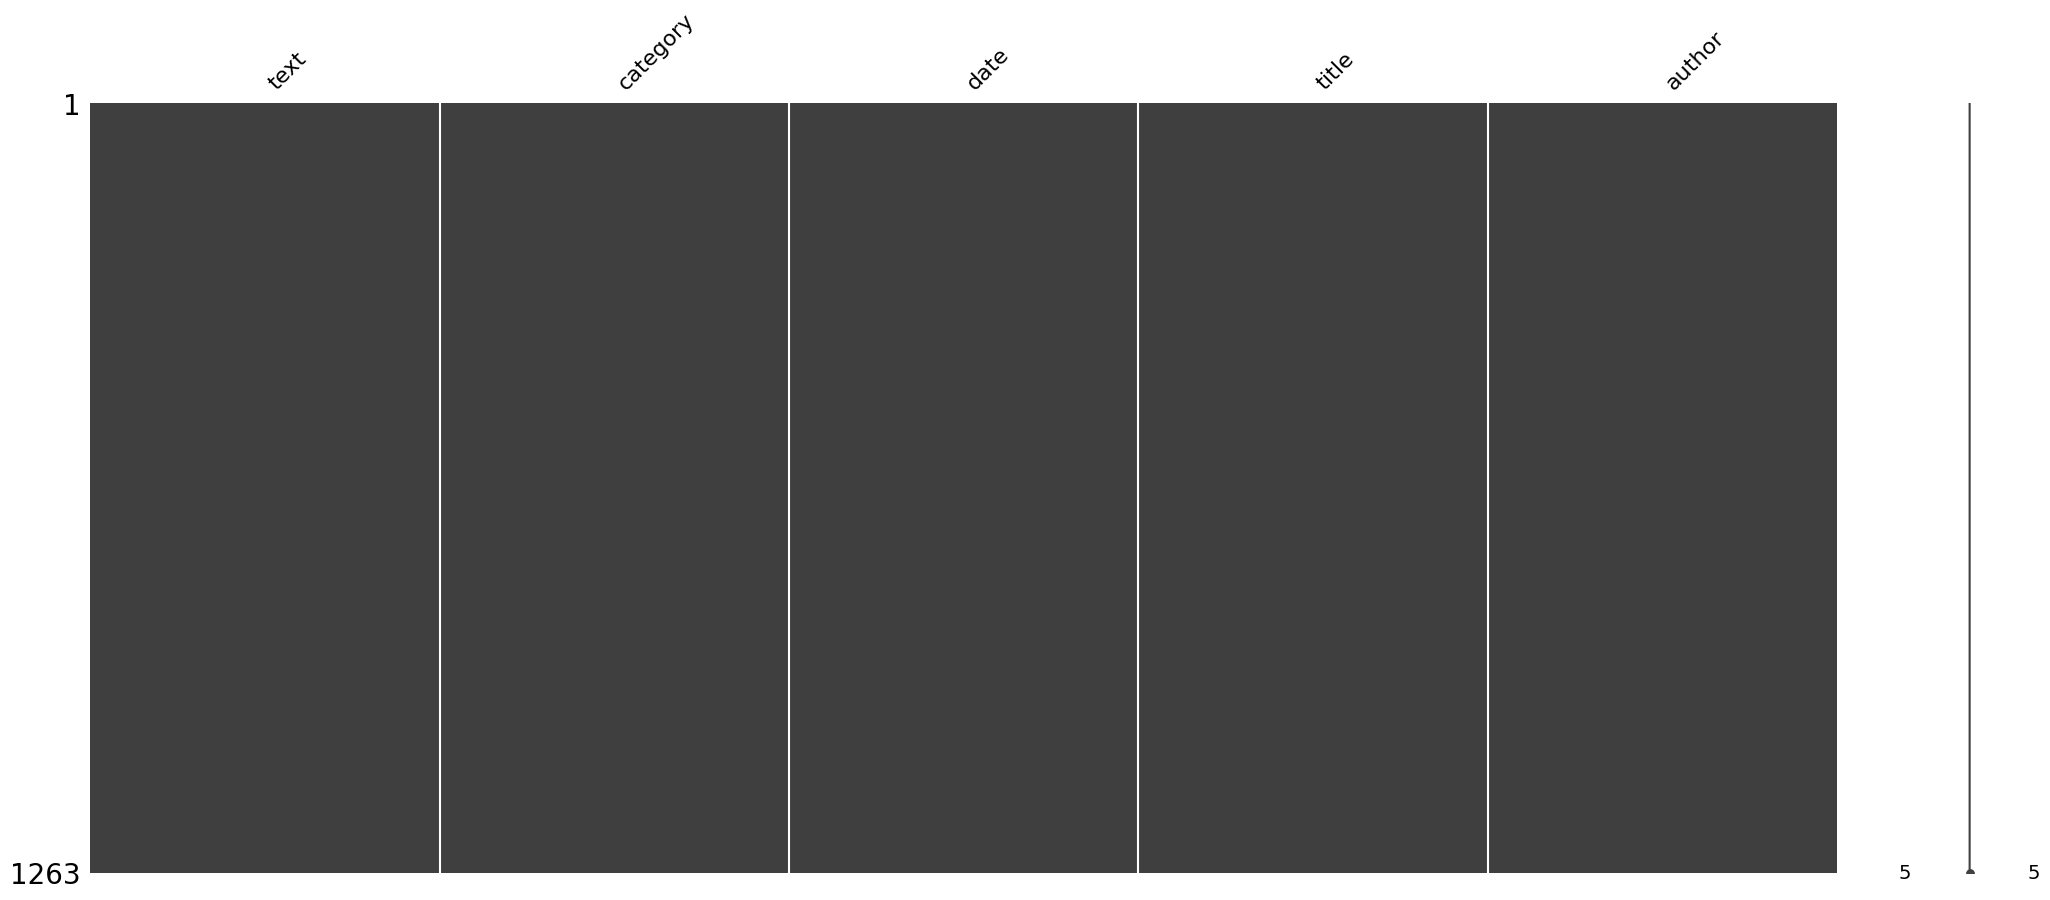

In [10]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
msno.matrix(df)

In [11]:
df.dropna(inplace=True)

# Removing all non-alphanumeric characters followed by other errors in the text

In [12]:
df['text'] = df['text'].replace('ſ', 's', regex=True)
df['text'] = df['text'].replace('<BOS>', ' ', regex=True)
df['text'] = df['text'].replace("[^a-zA-Z0-9 ']", ' ', regex=True)
df['text'] = df['text'].replace("@", ' ', regex=True)
df['text'] = df['text'].replace("EOS", ' ', regex=True)

In [13]:
#df['text'] = df['text'].replace("haue", ' ', regex=True)
#df['text'] = df['text'].replace("vnto", ' ', regex=True)

# Splitting the years into decades and restricting them to the range from 1470 to 1930

In [14]:
df['date'] = pd.to_numeric(df['date'], errors='coerce', downcast='integer')
#df['decade'] = (df['date'] // 10) * 10
df['decade'] = (df['date'] // 10) * 10

In [16]:
# Splitting the text into multiple sections for books that have a lot of data

def split_rows_based_on_word_count(df, column_name, word_count_threshold):
    new_rows = []

    for index, row in df.iterrows():
        text = row[column_name]
        words = text.split()
        
        if len(words) > word_count_threshold:
            # Split the text into multiple rows
            split_texts = [words[i:i+word_count_threshold] for i in range(0, len(words), word_count_threshold)]
            
            for split_text in split_texts:
                new_row = row.copy()
                new_row[column_name] = ' '.join(split_text)
                new_rows.append(new_row)
        else:
            # Keep the row as it is
            new_rows.append(row)

    return pd.DataFrame(new_rows, columns=df.columns)


word_count_threshold = 512  # Set your desired word count threshold
df = split_rows_based_on_word_count(df, 'text', word_count_threshold)

# Now, 'new_dataframe' contains the rows split based on the word count threshold


# Threshold of 2000 samples per decade 

In [17]:
threshold = 2000
df = df.groupby('decade').head(threshold)
print(df)

                                                   text  category  date  \
0     hEre begynneth the volume intituled and named ...  book.xml  1473   
0     O P A I K L A K In three books The first leaf ...  book.xml  1473   
0     will never have been looked at by a TCP editor...  book.xml  1473   
0     quayersleyda partandin two yere aftyrlabouredn...  book.xml  1473   
0     Iupiter andof the begynnyngandcomyng vp of Tro...  book.xml  1473   
...                                                 ...       ...   ...   
1254  Yet I was disturbed to learn the facts and hav...  book.txt  1921   
1254  do not know whe ther my mother is still alive ...  book.txt  1921   
1254  a teacher of the Law Have you forgotten this b...  book.txt  1921   
1254  him ask whether someone might be hiding her fr...  book.txt  1921   
1255  BC THE ECLOGUES by Virgil ECLOGUE I MELIBOEUS ...  book.txt  1921   

                                                  title            author  \
0     hEre-begynneth-t

In [18]:
df.sample(10)

,text,category,date,title,author,decade
1234,no less at the generosity of Rebecca by which ...,book.txt,1820,ivanhoe,Scott-walter,1820
511,aches cleane my head in peeces let my hart reu...,book.xml,1632,The-sweete-thoughts-of-death,henry-hawkins,1630
893,the Earth and Sea The next Thing I shall proce...,Book.xml,1753,The-American-instructor-or-Young-mans-best-com...,Fisher-Georger,1750
505,Oecolampadius Bibliander Beza Castalio Tremeli...,book.xml,1630,The-triall-of-the-protestant-priuate-spirit-VV...,james-sharpe,1630
620,is described by him to have departed out of th...,book.xml,1664,Romish-doctrines-not-from-the-beginning,daniel-whitby,1660
67,partes Of the whiche the fyrst parte conteyned...,book.xml,1502,Tabula,Ranulf-Higden,1500
1004,through which meanders the head branch of the ...,Book.xml,1791,Travels-through-North-&-South-Carolina-Georgia...,Bartram-William,1790
1119,word without asking mamma If he had been good ...,book.xml,1874,Lady-Anna,anthony-trollope,1870
770,to Assert the Right and Power of Parliaments A...,Book.xml,1712,A-collection-of-original-papers-and-material-t...,Defoe-Daniel,1710
593,to preserve greatRome Virg I accept your ch in...,book.xml,1654,Appius-and-Virginia-a-tragedy,john-webster,1650


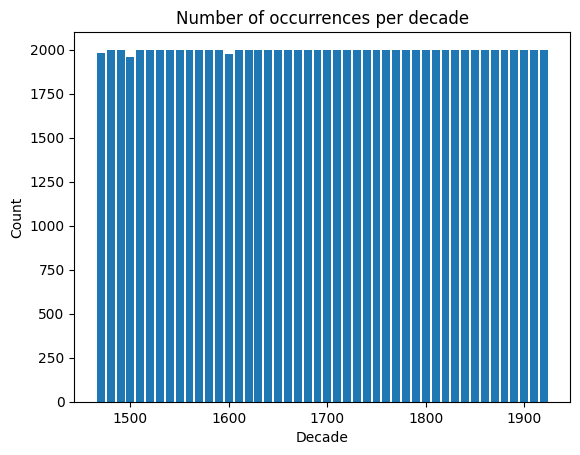

In [20]:
# Visualizing according to number of rows per decade to better understand the data distribution
decade_counts = df['decade'].value_counts().sort_index()

# Create a bar graph
plt.bar(decade_counts.index, decade_counts.values, width=8)  # Adjust the width as needed

# Set labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Number of occurrences per decade')

# Display the graph
plt.show()


In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91920 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      91920 non-null  object
 1   category  91920 non-null  object
 2   date      91920 non-null  int64 
 3   title     91920 non-null  object
 4   author    91920 non-null  object
 5   decade    91920 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [22]:
df3=df

## GPT Predictor

In [ ]:
pip install openai pandas openpyxl tqdm

## GPT-4o

100%|██████████| 2000/2000 [20:06<00:00,  1.66it/s]


Done! Results saved to 'with_predicted_years.xlsx'

Performance metrics:
RMSE: 106.30
MAE:  33.33
R^2:  0.3548


c:\Users\erazi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


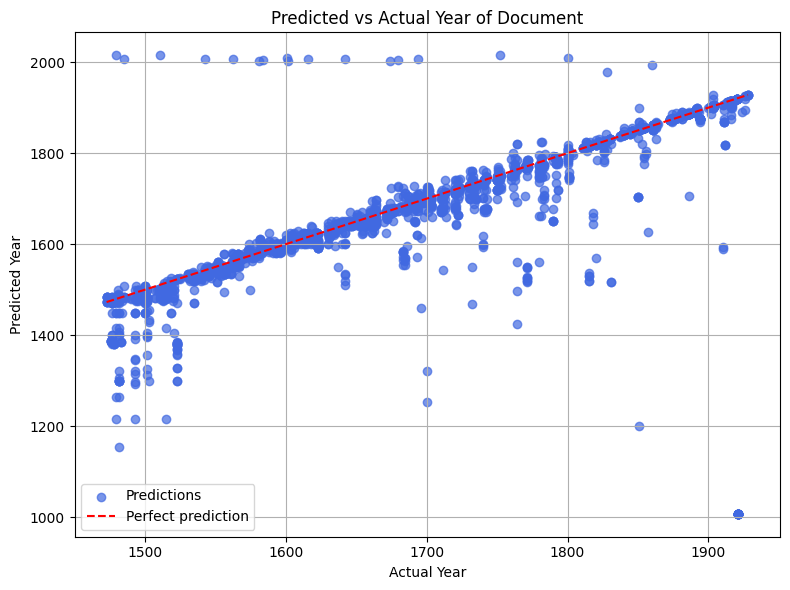

In [ ]:
import pandas as pd
import openai
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Set your OpenAI API key
openai.api_key = 
# Read your Excel file (replace 'your_file.xlsx' with your actual file path)
# <-- Provide your filename here
df = df.sample(2000)

def predict_year(document_text):
    prompt = (
        "You are an expert historian specializing in analyzing and dating written documents based on linguistic style, vocabulary, and historical context. "
        "Your task is to estimate the year in which a given document was most likely written. "
        "Be strictly objective and deterministic in your answer, avoiding speculation. "
        "Return ONLY the estimated year as a 4-digit number, with no explanation or extra text. "
        "If uncertain, make your best educated guess based on the content.\n\n"
        f"Document:\n{document_text}\n\nEstimated Year:"
    )
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o",  # or "gpt-4" if you have access
            messages=[
                {"role": "system", "content": "You are an expert at dating historical documents."},
                {"role": "user", "content": prompt}
            ],
            temperature=0
        )
        answer = response['choices'][0]['message']['content'].strip()
        import re
        match = re.search(r'\b(1[0-9]{3}|20[0-2][0-9]|202[0-4])\b', answer)
        if match:
            return int(match.group(0))
        else:
            return np.nan
    except Exception as e:
        print(f"Error: {e}")
        return np.nan

# Apply the function with progress bar
tqdm.pandas()
df['predicted_year'] = df['text'].progress_apply(predict_year)

# Save results
df.to_excel('with_predicted_years.xlsx', index=False)
print("Done! Results saved to 'with_predicted_years.xlsx'")

# Filter for rows with both actual and predicted years
eval_df = df.dropna(subset=['date', 'predicted_year'])
y_true = eval_df['date'].astype(int)
y_pred = eval_df['predicted_year'].astype(int)

# Calculate metrics
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nPerformance metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R^2:  {r2:.4f}")

# Plot: Actual vs Predicted Year
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='royalblue', label='Predictions')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual Year of Document')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predicted_vs_actual_year.png', dpi=150)
plt.show()

## GPT O3-mini

100%|██████████| 17/17 [18:20<00:00, 64.75s/it]


Done! Results saved.

Performance metrics:
RMSE: 126.03
MAE:  63.19
R^2:  0.0408


c:\Users\erazi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


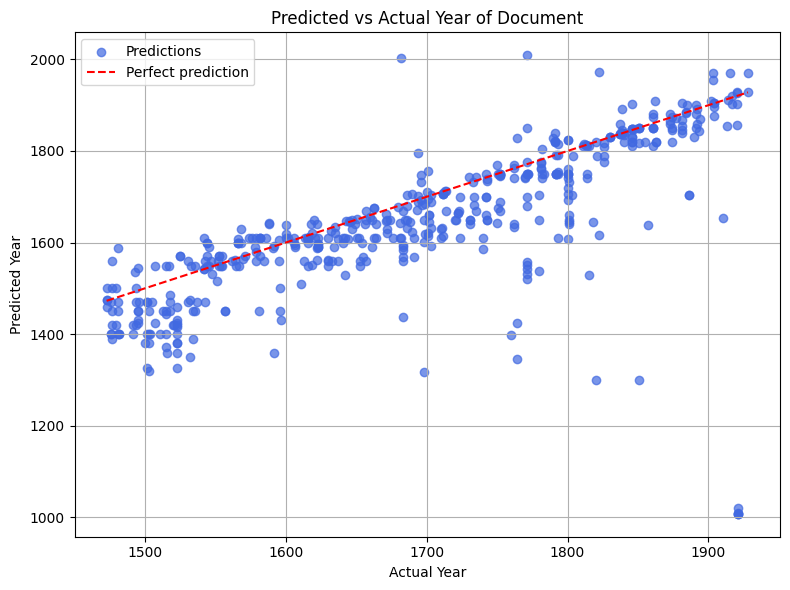

In [ ]:
import pandas as pd
import openai
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import concurrent.futures
import time
import re


openai.api_key = 
df = df3.sample(500, random_state=42).reset_index(drop=True)

def predict_year(document_text, model="o3-mini"):
    prompt = (
        "You are an expert historian specializing in analyzing and dating written documents based on linguistic style, vocabulary, and historical context. "
        "Your task is to estimate the year in which a given document was most likely written. "
        "Be strictly objective and deterministic in your answer, avoiding speculation. "
        "Return ONLY the estimated year as a 4-digit number, with no explanation or extra text. "
        "If uncertain, make your best educated guess based on the content.\n\n"
        f"Document:\n{document_text}\n\nEstimated Year:"
    )
    for _ in range(3):  # up to 3 tries
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=[
                    {"role": "system", "content": "You are an expert at dating historical documents."},
                    {"role": "user", "content": prompt}
                ],
                #temperature=0
            )
            answer = response['choices'][0]['message']['content'].strip()
            match = re.search(r'\b(1[0-9]{3}|20[0-2][0-9]|202[0-4])\b', answer)
            if match:
                return int(match.group(0))
            else:
                return np.nan
        except Exception as e:
            print(f"Error: {e}, retrying...")
            time.sleep(3)
    return np.nan

BATCH_SIZE = 30
MAX_WORKERS = 10  # Increase this for more parallelism; watch your rate limits

predicted_years = []
for start in tqdm(range(0, len(df), BATCH_SIZE)):
    batch = df['text'].iloc[start:start+BATCH_SIZE].tolist()
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        results = list(executor.map(predict_year, batch))
    predicted_years.extend(results)

df['predicted_year'] = predicted_years[:len(df)]
df.to_excel('with_predicted_years.xlsx', index=False)
print("Done! Results saved.")

eval_df = df.dropna(subset=['date', 'predicted_year'])
y_true = eval_df['date'].astype(int)
y_pred = eval_df['predicted_year'].astype(int)

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nPerformance metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R^2:  {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='royalblue', label='Predictions')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual Year of Document')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predicted_vs_actual_year.png', dpi=150)
plt.show()

## COT GPT

100%|██████████| 17/17 [06:29<00:00, 22.93s/it]


Done! Results saved.

Performance metrics:
RMSE: 74.26
MAE:  32.04
R^2:  0.6683


c:\Users\erazi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


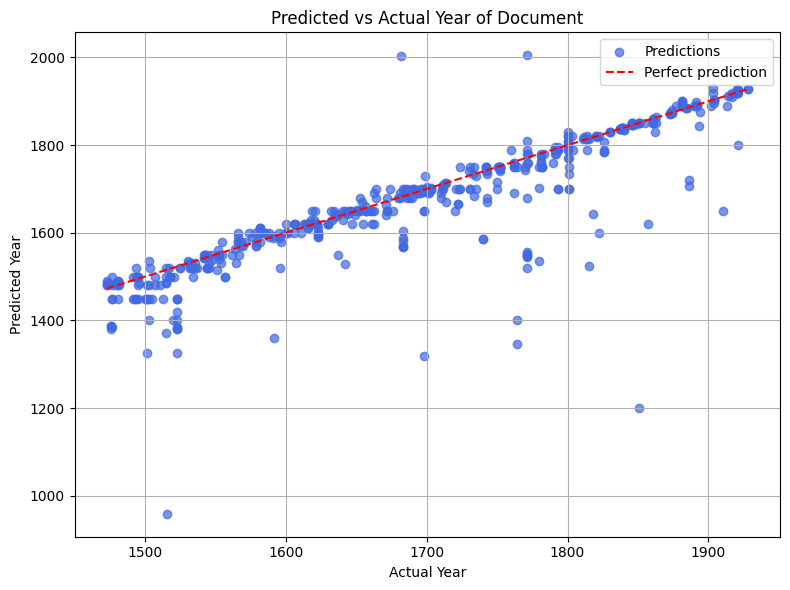

In [ ]:
import pandas as pd
import openai
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import concurrent.futures
import time
import re


openai.api_key = '' # <-- Replace with your actual key
df = df3.sample(500, random_state=42).reset_index(drop=True)

COT_PROMPT = """
You are an expert historical linguist. 
Follow the checklist; think step by step, but *avoid* using any 4-digit numerals until the final line.

### Checklist for your reasoning
- Orthography (e.g., long ſ, obsolete „-ick” endings)
- Pronouns and verb endings (thou/thee, -eth, -est)
- Spelling conventions (-our vs -or, centre vs center)
- Vocabulary and topical references (railway, telegraph, Great War, Internet)
- Punctuation & typography (modern quotes “ ” vs older ‘ ’ vs >>>)
- Any dated events or persons mentioned

### Worked examples
Document: "Ye olde shoppe ſells delightful confects."
Thought: Orthography includes long ſ; vocabulary 'ye' and 'olde'; no American spellings.  Likely early 18th century.  
YEAR: 1720

Document: "The color of the center panel was gray, noted the traveler."
Thought: American spellings (color, center, traveler) introduced after Webster’s reforms. Vocabulary modern.  
YEAR: 1880

### Now analyze the target document
Document:
{document_text}

Think through the checklist above without writing any 4-digit numbers.
End with a line that reads exactly:
YEAR: ####
"""

def predict_year(document_text, model="gpt-4o"):
    for _ in range(3):
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=[
                    {"role": "system", "content": "Answer with chain-of-thought then 'YEAR: ####'."},
                    {"role": "user", "content": COT_PROMPT.format(document_text=document_text)}
                ],
                temperature=0.3
            )
            answer = response['choices'][0]['message']['content'].strip()
            match = re.search(r'YEAR:\s*(\d{4})', answer)
            if match:
                return int(match.group(1))
        except Exception as e:
            print(f"Error: {e}, retrying...")
            time.sleep(3)
    return np.nan

BATCH_SIZE = 30
MAX_WORKERS = 10  # Increase this for more parallelism; watch your rate limits

predicted_years = []
for start in tqdm(range(0, len(df), BATCH_SIZE)):
    batch = df['text'].iloc[start:start+BATCH_SIZE].tolist()
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        results = list(executor.map(predict_year, batch))
    predicted_years.extend(results)

df['predicted_year'] = predicted_years[:len(df)]
df.to_excel('with_predicted_years.xlsx', index=False)
print("Done! Results saved.")

eval_df = df.dropna(subset=['date', 'predicted_year'])
y_true = eval_df['date'].astype(int)
y_pred = eval_df['predicted_year'].astype(int)

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nPerformance metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R^2:  {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='royalblue', label='Predictions')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual Year of Document')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predicted_vs_actual_year.png', dpi=150)
plt.show()

## Mistral chain of thought

100%|██████████| 100/100 [36:51<00:00, 22.11s/it]


Done! Results saved.

Performance metrics:
RMSE: 75.56
MAE:  43.22
R^2:  0.6566


c:\Users\erazi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


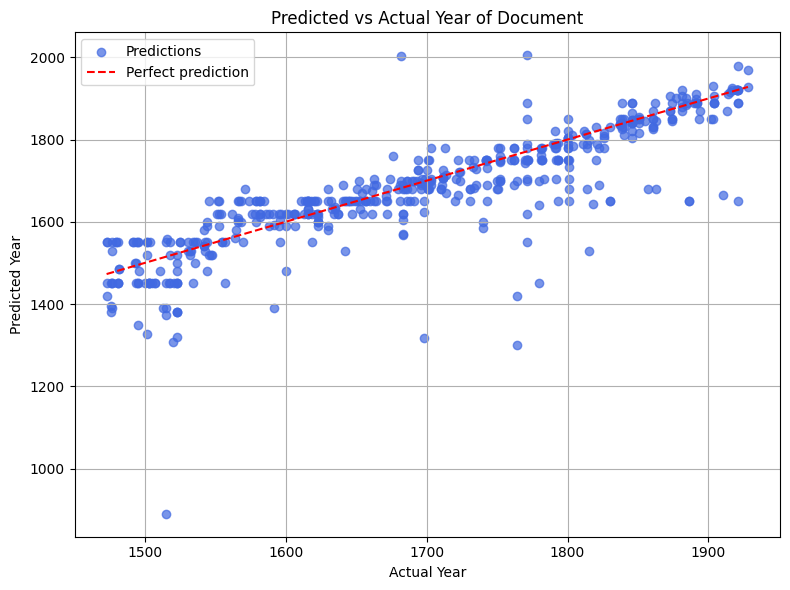

In [ ]:
import pandas as pd
import openai
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import concurrent.futures
import time
import re

df = df3.sample(500, random_state=42).reset_index(drop=True)


openai.api_key = ''  # <-- Replace with your actual key


import os
from mistralai import Mistral
import re
import numpy as np
import time

# Set your Mistral API key
api_key = 'FyDFoeNPnFRM67ZDML8DFyO2Fv184qQ8'
client = Mistral(api_key=api_key)

COT_PROMPT = """
You are an expert historical linguist. 
Follow the checklist; think step by step, but *avoid* using any 4-digit numerals until the final line.

### Checklist for your reasoning
- Orthography (e.g., long ſ, obsolete „-ick” endings)
- Pronouns and verb endings (thou/thee, -eth, -est)
- Spelling conventions (-our vs -or, centre vs center)
- Vocabulary and topical references (railway, telegraph, Great War, Internet)
- Punctuation & typography (modern quotes “ ” vs older ‘ ’ vs >>>)
- Any dated events or persons mentioned

### Worked examples
Document: "Ye olde shoppe ſells delightful confects."
Thought: Orthography includes long ſ; vocabulary 'ye' and 'olde'; no American spellings.  Likely early 18th century.  
YEAR: 1720

Document: "The color of the center panel was gray, noted the traveler."
Thought: American spellings (color, center, traveler) introduced after Webster’s reforms. Vocabulary modern.  
YEAR: 1880

### Now analyze the target document
Document:
{document_text}

Think through the checklist above without writing any 4-digit numbers.
End with a line that reads exactly:
YEAR: ####
"""

def predict_year(document_text, model="mistral-large-latest"):
    for _ in range(3):
        try:
            response = client.chat.complete(
                model=model,
                messages=[
                    {"role": "system", "content": "Answer with chain-of-thought then 'YEAR: ####'."},
                    {"role": "user", "content": COT_PROMPT.format(document_text=document_text)}
                ],
                temperature=0.3
            )
            answer = response.choices[0].message.content.strip()
            match = re.search(r'YEAR:\s*(\d{4})', answer)
            if match:
                return int(match.group(1))
        except Exception as e:
            print(f"Error: {e}, retrying...")
            time.sleep(3)
    return np.nan

BATCH_SIZE = 5
MAX_WORKERS = 10  # Increase this for more parallelism; watch your rate limits

predicted_years = []
for start in tqdm(range(0, len(df), BATCH_SIZE)):
    batch = df['text'].iloc[start:start+BATCH_SIZE].tolist()
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        results = list(executor.map(predict_year, batch))
    predicted_years.extend(results)

df['predicted_year'] = predicted_years[:len(df)]
df.to_excel('with_predicted_years.xlsx', index=False)
print("Done! Results saved.")

eval_df = df.dropna(subset=['date', 'predicted_year'])
y_true = eval_df['date'].astype(int)
y_pred = eval_df['predicted_year'].astype(int)

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nPerformance metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R^2:  {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='royalblue', label='Predictions')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual Year of Document')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predicted_vs_actual_year.png', dpi=150)
plt.show()